In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [3]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_5/lesson_5_ads_data.csv.zip'

In [4]:
ads_data = pd.read_csv(path_to_file, compression='zip')

In [5]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [21]:
ads_data['full_data'] = pd.to_datetime(ads_data.time, unit='s')
ads_data['date'] = pd.to_datetime(as_data.date)

In [22]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_data
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [39]:
ads_data.date.dt.date


0          2019-04-01
1          2019-04-01
2          2019-04-01
3          2019-04-01
4          2019-04-01
              ...    
3176709    2019-04-06
3176710    2019-04-06
3176711    2019-04-06
3176712    2019-04-06
3176713    2019-04-06
Name: date, Length: 3176714, dtype: object

In [ ]:
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.

In [41]:
ads_data_event = ads_data.groupby('date', as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('date')\
    .rename(columns={'ad_id':'count_event'})
ads_data_event['day'] = ads_data_event.date.dt.date

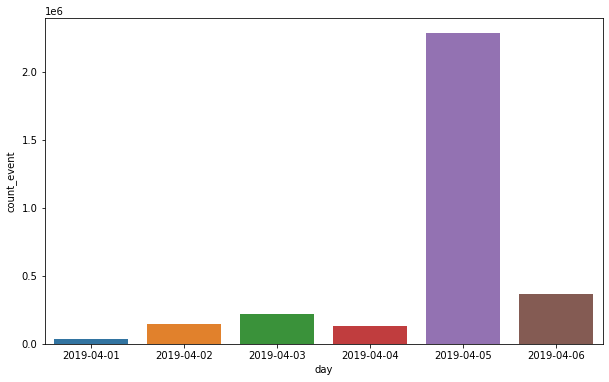

In [44]:
plt.figure(figsize=[10,6])
sns.barplot(data=ads_data_event, x='day', y='count_event')

In [ ]:
#число показов, число кликов

In [88]:
clic_view_data = ads_data.groupby(['date', 'event'], as_index=False)\
    .agg({'ad_id':'count'})\
    .pivot(columns='event', values='ad_id', index='date')\
    .reset_index()

In [54]:
# уникальных кампаний
ads_data.client_union_id.nunique()

336

In [55]:
#число уникальных объявлений
ads_data.ad_id.nunique()

355

In [ ]:
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

In [57]:
ads_data.query("date == '2019-04-05'")\
    .groupby(['event'])\
    .agg({'ad_id':'count'})

,ad_id
event,
click,501595
view,1783288


In [59]:
ads_data.query("date == '2019-04-05'")\
    .groupby(['campaign_union_id'])\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id', ascending=False)\
    .head()

,ad_id
campaign_union_id,
112260,2166611
29901,27186
44635,8268
46583,7327
44956,5656


In [61]:
id_comp = 112260

In [63]:
ads_data.dtypes


ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_data                datetime64[ns]
dtype: object

In [75]:
ads_data[ads_data.campaign_union_id == id_comp].groupby(['date', 'event'], as_index=False)\
    .agg({'ad_id':'count'})\
    .pivot(index='date', columns='event', values='ad_id')\
    .reset_index()

event,date,click,view
0,2019-04-05,500207,1666404
1,2019-04-06,80229,268384


In [ ]:
# Найти топ 10 объявлений по CTR за все время. 
#CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
#Различается ли средний и медианный CTR объявлений в наших данных?

In [78]:
ctr_ads_data = ads_data.groupby(['ad_id', 'event'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(columns='event', values='date', index='ad_id')\
    .reset_index()

In [80]:
ctr_ads_data = ctr_ads_data.assign(ctr = ctr_ads_data.click/ctr_ads_data.view, 
                                   ctr_percent = 100 * ctr_ads_data.click/ctr_ads_data.view)

In [82]:
ctr_ads_data.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_percent
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [83]:
ctr_ads_data.ctr.median()

0.010753240746688594

In [85]:
ctr_ads_data.ctr.mean()

0.020628096080757954

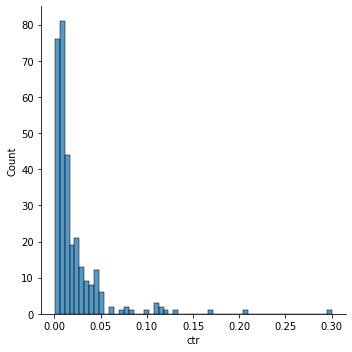

In [87]:
sns.displot(ctr_ads_data.ctr, kde=False)

In [ ]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [95]:
ctr_ads_data = ctr_ads_data.fillna(0)

In [102]:
bug_ads_data = ctr_ads_data.query('view == 0')

In [103]:
bug_ads_data.shape

(9, 5)

In [112]:
list_bug_data = bug_ads_data.ad_id
ads_data[ads_data.ad_id.isin(list_bug_data)].groupby('platform', as_index=False).agg({'ad_id':'count'}).sort_values(by='ad_id')

,platform,ad_id
2,web,53
1,ios,92
0,android,141


In [113]:
ads_data.groupby('platform', as_index=False).agg({'ad_id':'count'}).sort_values(by='ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [ ]:
# Есть ли различия в CTR у объявлений с видео и без? 
#А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?


In [10]:
df_2019_04_04 = ads_data[ads_data.date == '2019-04-04']\
    .groupby(['ad_id', 'event'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(columns='event', values='date', index='ad_id')\
    .reset_index()\
    .fillna(0)

In [13]:
df_2019_04_04.head()

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882


In [11]:
df_2019_04_04['ctr'] = df_2019_04_04.click/df_2019_04_04.view

In [15]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [17]:
df_quantile_yes_video = ads_data[ads_data.has_video == 1]\
    .groupby(['ad_id', 'event'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(columns='event', values='date', index='ad_id')\
    .reset_index()\
    .fillna(0)

In [19]:
df_quantile_yes_video['ctr'] = df_quantile_yes_video.click/df_quantile_yes_video.view

In [20]:
df_quantile_no_video = ads_data[ads_data.has_video == 0]\
    .groupby(['ad_id', 'event'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(columns='event', values='date', index='ad_id')\
    .reset_index()\
    .fillna(0) 

In [21]:
df_quantile_no_video['ctr'] = df_quantile_no_video.click/df_quantile_no_video.view

In [22]:
df_quantile_yes_video.ctr.quantile()

0.002385565145220477

In [23]:
df_quantile_no_video.ctr.quantile()

0.010050251256281407